# Linear Regression: Boston Housing Dataset

In the present notebook we are going to work with Boston Housing dataset. This dataset contains 506 instances, each with 14 attributes providing information relative to housing in different Boston neighborhoods. The attribute we want to predict is  the median value of homes in $1000s, **MEDV**.

The Scikit-Learn Library (sklearn) will be used. This library, which gives access to many machine learning methods, wil also allow us to load the dataset. With that being said, we import the libraries and charge the dataset.

*Note: check .DESCR for more detailed information.*

### Table of Contents
- [0. Loading the Dataset](#section0)
- [1. Exploratory Analysis](#1.-Exploratory-Analysis)
- [2. Linear Regression](#2.-Linear-Regression)
- [3. Linear Regression with sklearn](#3.-Linear-Regression-with-sklearn)
- [4. Multiple Linear Regression](#4.-Multiple-Linear-Regression)

<a id='section0'></a>
## 0. Loading the Dataset

In [1]:
import sklearn as skl
from sklearn.datasets import load_boston
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
boston_dataset = load_boston()
X = boston_dataset.data       #matrix of our data X
Y = boston_dataset.target     #matrix of our target data Y
print()

<a id='#1.-Exploratory-Analysis'></a>
## 1. Exploratory Analysis

This notebook focusses on the linear regression method. For this reason, the relation between the attribute **RM** and our **Y=MEDV** will be studied in this analysis. First, let's plot one variable against the other.

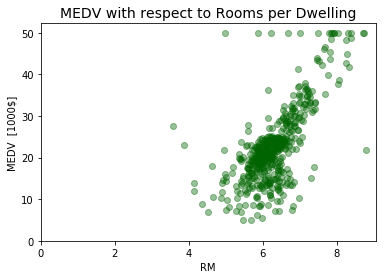

In [3]:
RM=X[:,5]     #If in doubt, check boston_dataset.DESCR

length=len(RM)
x=range(0,length)

#Scatter plot between RM and MEDV
plt.scatter(RM,Y,c='darkgreen',alpha=0.4)
plt.title('MEDV with respect to Rooms per Dwelling', fontsize=14)
plt.xlabel('RM')
plt.ylabel('MEDV  [1000$]')
plt.xlim(0)
plt.ylim(0)
plt.show()

We also find the correlation matrix between the variables. Of course, diagonal terms = 1 (correlation of value with itself):

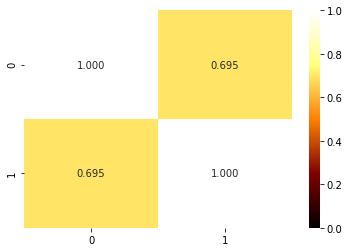

In [4]:
corr=np.corrcoef(X[:,5],Y)
sb.heatmap(corr, annot=True, fmt=".3f",cmap='afmhot',vmin=0)
plt.show()

In order to compare the distribution of the two variables (similarly as the correlation value does, but here, visually) we overlap the two standarized distributions on top of each other. In such a way, we can compare them, regardless of their range of values. If both distributions overlap, it means that they have a high correlation.

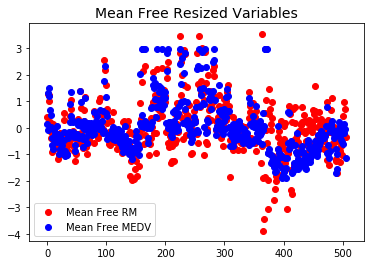

In [5]:
SRM=(X[:,5]-X[:,5].mean())/np.std(X[:,5])
SY=(Y-Y.mean())/np.std(Y)

plt.scatter(x,SRM,c='red',label='Mean Free RM')
plt.scatter(x,SY,c='blue',label='Mean Free MEDV')
plt.title('Mean Free Resized Variables', fontsize=14)
plt.legend(loc='lower left')
plt.show()

If we wanted to know more about the price distribution, we could simply plot the histogram of prices. A suprising phenomenon occurs, that also took place in the first plot we generated: the amount of houses with price 50.000$ becomes absurdly high. This unreal effect is probably caused due to the values being truncated above that threshold.

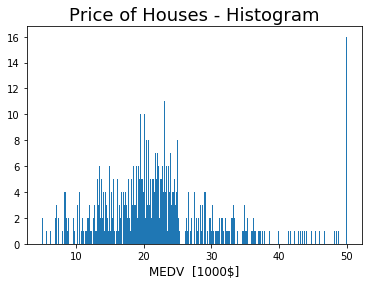

In [6]:
#Histogram
plt.hist(Y,bins=300)
plt.title('Price of Houses - Histogram', fontsize=18)
plt.xlabel('MEDV  [1000$]', fontsize=12)
plt.show()

We can also calculate the average price of a house for an arbitrary range of number of rooms, let's say, between 5 and 6 rooms.

In [7]:
RMlog=np.logical_and(RM>5,RM<6)
Yrange=Y[RMlog]
Yrangemean=Yrange.mean()
print(Yrangemean*1000,'$\n')

17551.5923566879 $



<a id='2.-Linear-Regression'></a>
## 2. Linear Regression

In order to perform the linear regression, we will use the the Ordinary Least Squares method (OLS). This method finds a line with optimal slope ($W_1$) and intercept ($W_0$) that minimizes the squared sum of distances between each point and the estimated line. This is done by finding the minimum of the Mean Squared Error (MSE) function, which in its vectorized for:

$ \operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $

where since $Y_{pi}=WX$ we find (solution [here](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)):

$W = (X^TX)^{-1}X^TY$

*Note: In order to preserve the intercept independent, the X matrix includes a column of 1's.*

The intercept is -34.670620776439506
The slope is 9.102108981180457


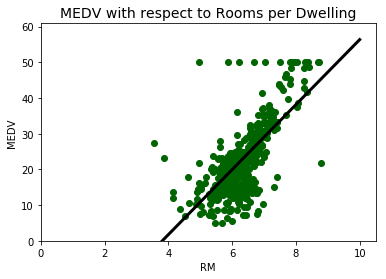

We can calculate the estimated prices of a house with a certain number of rooms, for example, for 5 rooms is 10839.92412946278 $
In the opposite way, the estimated number of rooms for a certain price, let's say for example 45.000 $ is 8.752984713890669


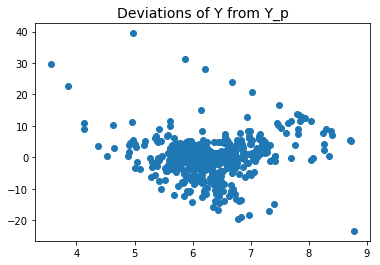

The value of the EMC is: 43.60055177116957 



In [8]:
#We add a column of ones to RM for the independent term:
o=np.ones(len(RM))
RMr=np.column_stack((o,RM))

K=(RMr.T@RMr)
Km=np.linalg.inv(K)

W = Km @ RMr.T @ Y

print('The intercept is',W[0])
print('The slope is',W[1])

xr=np.arange(0,10,0.001)
regression= lambda z: W[0]+W[1]*z
plt.plot(xr,regression(xr),lw=3,c='k')
plt.scatter(RM,Y,c='darkgreen')
plt.title('MEDV with respect to Rooms per Dwelling', fontsize=14)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.xlim(0)
plt.ylim(0)
plt.show()


print('We can calculate the estimated prices of a house with a certain number of rooms, for example, for 5 rooms is', regression(5)*1000,'$')
regression_inv = lambda z: (z-W[0])/W[1]
print('In the opposite way, the estimated number of rooms for a certain price, let\'s say for example 45.000 $ is',regression_inv(45))

Y_p = regression(RM)
diff = Y-Y_p
plt.scatter(RM,diff)
plt.title('Deviations of Y from Y_p', fontsize=14)
plt.show()

EMC=(np.dot(diff,diff))/(len(RM))
print('The value of the EMC is:',EMC,'\n')

<a id='3.-Linear-Regression-with-sklearn'></a>
## 3. Linear Regression with sklearn

Here we test the same as in [Section 2](#2.-Linear-Regression) but now using the sklearn library directly, instead of writing the code by ourselves.

*Recall that fit_intercept is used to fix whether we work with non-zero intercept (True; default value) or the regression has zero slope (False).*

In [9]:
RM=RM.reshape(len(RM),1)
#Alternative: RM=RM[:,np.newaxis]    o     np.reshape(RM,(506,1)) 
F = linear_model.LinearRegression().fit(RM,Y)

print('The slope given by sklearn is:',F.coef_)
print('The origin intercept given by sklearn is:',F.intercept_)
print('The predicted value at RM=9 is:',F.predict([[9]]))
print('The mean squared error is:',mean_squared_error(Y,F.predict(RM)),'\n')

The slope given by sklearn is: [9.10210898]
The origin intercept given by sklearn is: -34.67062077643857
The predicted value at RM=9 is: [47.24836005]
The mean squared error is: 43.60055177116956 



<a id='#4.-Multiple-Linear-Regression'></a>
## 4. Multiple Linear Regression

We can generalize the concept of linear regression to more variables. Adding more variables means adding more information, and that should help to improve our prediction i.e. reducing the MSE. Still, we will have:

 $W = (X^TX)^{-1}X^TY$
 
We will include the **LSTAT** (% lower status of the population) and **PTRATIO** (pupil-teacher ratio by town) variables.
A comparison between the mean squared error with respect to the Section 2 regression will be done.

In [10]:
PTRATIO=X[:,10]
PTRATIO=PTRATIO.reshape(len(PTRATIO),1)
LSTAT=X[:,12]
LSTAT=LSTAT.reshape(len(LSTAT),1)

o=np.ones(len(RM))
Mr=np.column_stack((o,RM,PTRATIO,LSTAT))

K=(Mr.T @ Mr)
Km=np.linalg.inv(K)

W = Km @ Mr.T @ Y

print('The values of intercept and the three slopes given by our regression are:',W,'\n')
print('Due to the possible correlation between values, we see a great change of the slope between Y and RM now and in the previous exercise (previous slope = 9.1). This makes sense, since the multicollinearity assumption is probably not fulfilled.\n')

#We omit the column of ones, since we will work with the SKLearn library
Mr=np.column_stack((RM,PTRATIO,LSTAT))
F1 = linear_model.LinearRegression().fit(Mr,Y)

print('Now, we will compare with the sklearn regression values. The coefficients (slopes) given by SKLearn are:', F1.coef_,
      '. The intercept at the origin is:', F1.intercept_,'\n')


a=[6,18,15.0]
a=np.array(a)
a=a.reshape(1,3)
print('TEST: A specific prediction for',a,'will be:',F1.predict(a),'\n')

print('Now, we will calculate the minimum of the MSE (obtained from our method), which is:', mean_squared_error(Y,F1.predict(Mr)))
print('The error is lower than the previous one. As it was stated previously, this most likely happens because more variables are taken into account, which predicts more accurately the behaviour of the prices.')

The values of intercept and the three slopes given by our regression are: [18.56711151  4.51542094 -0.93072256 -0.57180569] 

Due to the possible correlation between values, we see a great change of the slope between Y and RM now and in the previous exercise (previous slope = 9.1). This makes sense, since the multicollinearity assumption is probably not fulfilled.

Now, we will compare with the sklearn regression values. The coefficients (slopes) given by SKLearn are: [ 4.51542094 -0.93072256 -0.57180569] . The intercept at the origin is: 18.567111505395207 

TEST: A specific prediction for [[ 6. 18. 15.]] will be: [20.32954586] 

Now, we will calculate the minimum of the MSE (obtained from our method), which is: 27.130405758497066
The error is lower than the previous one. As it was stated previously, this most likely happens because more variables are taken into account, which predicts more accurately the behaviour of the prices.
